In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

from pylab import rcParams

#Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from scipy import stats
import researchpy as rp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.externals.six import StringIO
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

#missing data visualization
import missingno as msno

from pylab import savefig
from sklearn.ensemble import IsolationForest


# for the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Dropout


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
from io import StringIO

from sklearn.metrics import roc_curve, auc



#import warnings
#warnings.filterwarnings("ignore")

In [2]:
pip install researchpy

Data info:
https://www.kaggle.com/kevinarvai/clinvar-conflicting/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=20312

Related paper: ClinVar :improving access to variant interpretations
and supporting evidence/ : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5753237/pdf/gkx1153.pdf


The Dataset was obtained by ClinVar, a public resource used to collect information about genetic variants. ClinVar classifies each of these variants into one of three categories:

1. Likely Benign or Benign
2. VUS (A variation in a genetic sequence for which the association with disease risk is unclear)
3. Likely Pathogenic or Pathogenic

The variants were categorized via manual testing by multiple labs. Conflicting categorizations have been assigned to the CLASS column, a 1 represents a conflicting categorizations by different labs while a 0 represents a consistent categorization.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving clinvar_conflicting.csv to clinvar_conflicting (1).csv


In [0]:
df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)
# or we can do df = pd.read_csv('clinvar_conflicting.csv', dtype={'CHROM': str, 38: str, 40: object})

In [9]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,GENEINFO,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,single_nucleotide_variant,NaN,AGRN:375790,SO:0001583|missense_variant,1.0,NaN,0,C,missense_variant,MODERATE,Transcript,NM_001305275.1,protein_coding,1/39,NaN,61,11,4,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,single_nucleotide_variant,NaN,AGRN:375790,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,Transcript,NM_001305275.1,protein_coding,1/39,NaN,95,45,15,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,single_nucleotide_variant,NaN,AGRN:375790,SO:0001583|missense_variant,1.0,NaN,1,C,missense_variant,MODERATE,Transcript,NM_001305275.1,protein_coding,1/39,NaN,117,67,23,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,single_nucleotide_variant,NaN,AGRN:375790,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,Transcript,NM_001305275.1,protein_coding,2/39,NaN,311,261,87,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,single_nucleotide_variant,NaN,AGRN:375790,SO:0001819|synonymous_variant,1.0,NaN,1,T,synonymous_variant,LOW,Transcript,NM_001305275.1,protein_coding,4/39,NaN,576,526,176,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [10]:
# CLASS column contains 0 or 1 value for classification
df.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

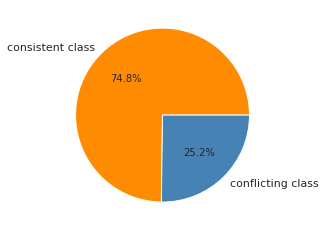

In [11]:
labels = 'consistent class' , 'conflicting class'
values = df['CLASS'].value_counts()
colors = ['darkorange','steelblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%.1f%%',colors =colors)
plt.show()

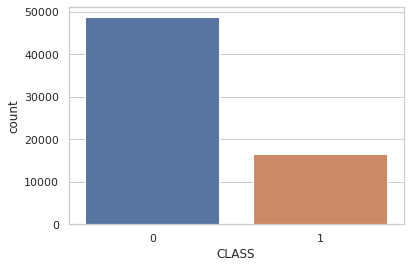

In [12]:
sns.countplot(df['CLASS'], label= "count" )

In [13]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
GENEINFO               6123
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [14]:
# drop columns with more than 50% of null values

df.replace({'':np.nan})
df = df.dropna(thresh=0.5*len(df), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDISDB          65188 non-null  object 
 8   CLNDN             65188 non-null  object 
 9   CLNHGVS           65188 non-null  object 
 10  CLNVC             65188 non-null  object 
 11  GENEINFO          59065 non-null  object 
 12  MC                58219 non-null  object 
 13  ORIGIN            59065 non-null  float64
 14  CLASS             65188 non-null  int64  
 15  Allele            65188 non-null  object 
 16  Consequence       65188 non-null  object

In [15]:
# add column with a unique value of 65188
df.insert(0,"KEY", df.CLNHGVS)
df['KEY'].nunique()==len(df)

True

In [0]:
# For Protein_position, CDS_position, and cDNA_position, some numeric values were separated by '_' so we will clean it and use the first number.

def cleaning (df, columns):
    for col in columns:
        cleaning = pd.DataFrame(df[col][df[col].notnull()].str.split("-").tolist(), columns = ["X","Y"])
        cleaning["X"][cleaning["X"]=="?"] = cleaning["Y"]  # why do we do "?"
        key = df[[col,"KEY"]][df[col].notnull()]["KEY"]
        
        counter = 0
        
        for i in key.index:
            df[col][i] = cleaning["X"][counter]
            counter += 1
        df[col] = df[col].astype(float)
    return df
        


In [17]:
data_cleaning = cleaning (df, ["CDS_position","cDNA_position","Protein_position"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
# for separating Numerator and denominator in Exon column
def convert_to_float(df,columns):
  
  for col in columns:
       
    convert_to_float = pd.DataFrame(df[col][df[col].notnull()].str.split("/").tolist(),columns=["Numerator","Denominator"])
    convert_to_float = convert_to_float.astype("float")
    convert_to_float["Result"] = convert_to_float["Numerator"] / convert_to_float["Denominator"]
    key =df[[col,"KEY"]][df[col].notnull()]["KEY"]

    counter = 0
    for i in key.index:

      df[col][i] = convert_to_float["Result"][counter]
      counter += 1
    df[col] = df[col].astype(float)

  return df

In [19]:
df = convert_to_float(df, ["EXON"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_drop_numeric = df.drop(['GENEINFO','Codons','MC','Feature_type','Allele','Consequence','IMPACT','REF','ALT','Feature','Amino_acids','Codons','BIOTYPE'], axis =1)

In [0]:
df_drop_numeric = df_drop_numeric.apply(LabelEncoder().fit_transform)

In [22]:
df_drop_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   KEY               65188 non-null  int64
 1   CHROM             65188 non-null  int64
 2   POS               65188 non-null  int64
 3   AF_ESP            65188 non-null  int64
 4   AF_EXAC           65188 non-null  int64
 5   AF_TGP            65188 non-null  int64
 6   CLNDISDB          65188 non-null  int64
 7   CLNDN             65188 non-null  int64
 8   CLNHGVS           65188 non-null  int64
 9   CLNVC             65188 non-null  int64
 10  ORIGIN            65188 non-null  int64
 11  CLASS             65188 non-null  int64
 12  EXON              65188 non-null  int64
 13  cDNA_position     65188 non-null  int64
 14  CDS_position      65188 non-null  int64
 15  Protein_position  65188 non-null  int64
 16  STRAND            65188 non-null  int64
 17  LoFtool           65188 non-nul

In [23]:
# Gettin summary statistics
rp.summary_cont(df_drop_numeric['CLNHGVS'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CLNHGVS,65188.0,32593.5,18818.299011,73.70493,32449.03831,32737.96169


In [0]:
#df_drop = df_drop.apply(pd.to_numeric, errors='coerce')<-If you do this, you get NaN from object columns for some features..

In [0]:
df_drop_numeric.dropna(axis = 0, inplace = True)

In [26]:
df_drop_numeric.isnull().sum()

KEY                 0
CHROM               0
POS                 0
AF_ESP              0
AF_EXAC             0
AF_TGP              0
CLNDISDB            0
CLNDN               0
CLNHGVS             0
CLNVC               0
ORIGIN              0
CLASS               0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
STRAND              0
LoFtool             0
CADD_PHRED          0
CADD_RAW            0
dtype: int64

# split data into train and test sets

In [0]:
X = df_drop_numeric.drop('CLASS', axis=1)
y = df_drop_numeric['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)




# Logistic regression before balancing data

In [0]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [0]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[4838   19]
 [1648   14]]


In [31]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      4857
           1       0.42      0.01      0.02      1662

    accuracy                           0.74      6519
   macro avg       0.59      0.50      0.43      6519
weighted avg       0.66      0.74      0.64      6519



In [32]:


# calculate scores

lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))


Logistic: ROC AUC=0.502


## Decision tree before balancing data


In [33]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
best_decision_tree = DecisionTreeClassifier(max_depth=3)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
y_pred = best_decision_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[4856    1]
 [1659    3]]


In [37]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      4857
           1       0.75      0.00      0.00      1662

    accuracy                           0.75      6519
   macro avg       0.75      0.50      0.43      6519
weighted avg       0.75      0.75      0.64      6519



## Random Forest before balancing data

In [0]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [39]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4494  363]
 [1090  572]]


In [40]:
print("RandomForest Classification Report:\n", metrics.classification_report(y_test, y_pred_rf))

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      4857
           1       0.61      0.34      0.44      1662

    accuracy                           0.78      6519
   macro avg       0.71      0.63      0.65      6519
weighted avg       0.76      0.78      0.75      6519



# Gradient Boosting before balancing data

In [41]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2342


In [42]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4744  113]
 [1414  248]]


In [43]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      4857
           1       0.69      0.15      0.25      1662

    accuracy                           0.77      6519
   macro avg       0.73      0.56      0.55      6519
weighted avg       0.75      0.77      0.70      6519



# XGBoost Model before balancing data

In [0]:
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]





In [45]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4708  149]
 [1389  273]]


In [46]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      4857
           1       0.65      0.16      0.26      1662

    accuracy                           0.76      6519
   macro avg       0.71      0.57      0.56      6519
weighted avg       0.74      0.76      0.71      6519



# Balanced data by reducing number of samples

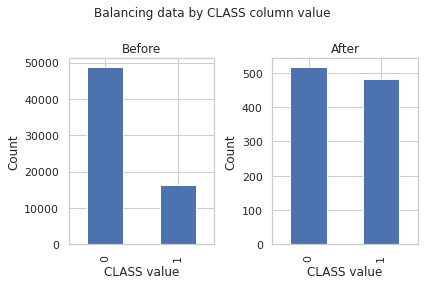

In [47]:
# Balance
g = df_drop_numeric.groupby('CLASS')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
# Extract smaller sample to avoid memory error later, when training starts
df_balanced = df_balanced.sample(1000)

# Illustrate balancing results on plots
f, ax = plt.subplots(1,2)
# Before balancing plot
df.CLASS.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Before")
ax[0].set_xlabel("CLASS value")
ax[0].set_ylabel("Count")
# After balanced plot
df_balanced.CLASS.value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title("After")
ax[1].set_xlabel("CLASS value")
ax[1].set_ylabel("Count")

plt.suptitle("Balancing data by CLASS column value")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



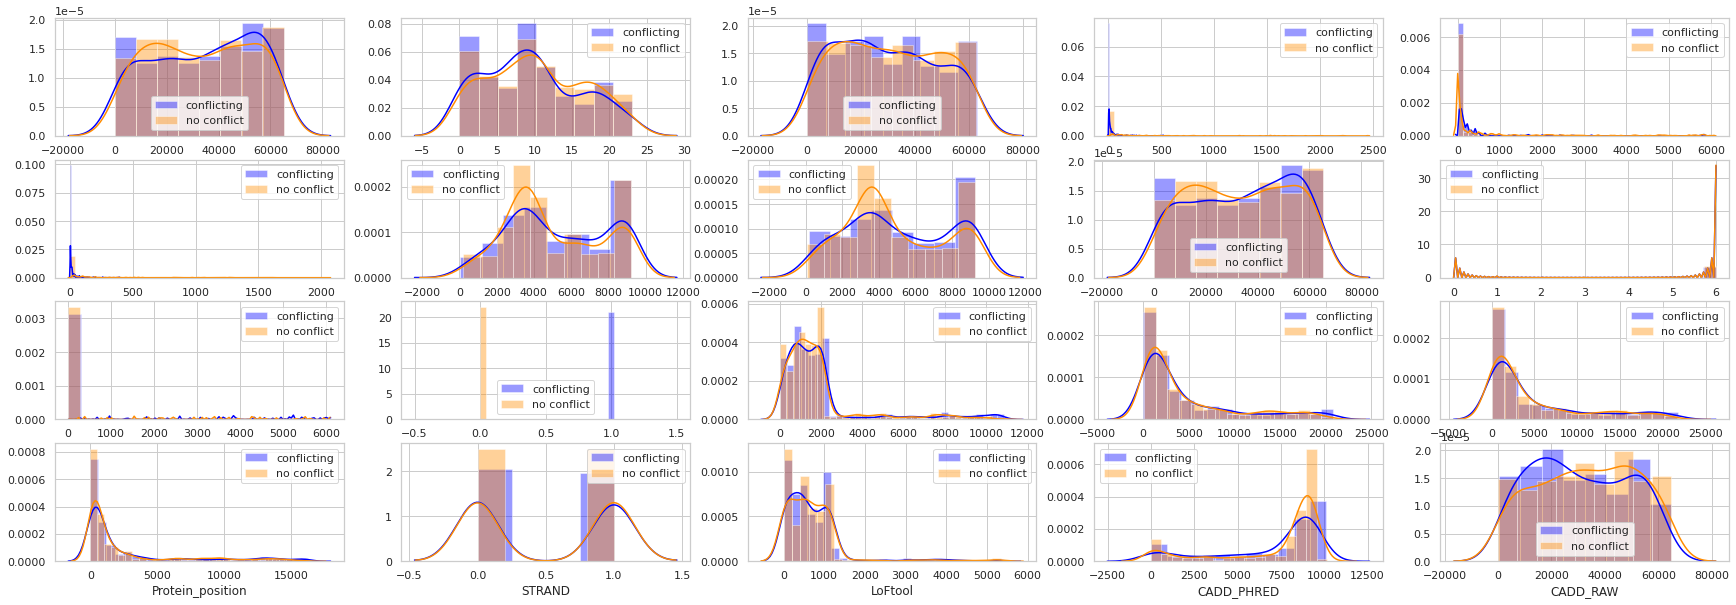

In [48]:
fig = plt.figure(figsize = (30,10))
j = 0 
for i in df_drop_numeric.columns:
    plt.subplot(4, 5, j+1)
    j += 1
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 1], color = 'blue', label = 'conflicting')
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 0], color = 'darkorange', label = 'no conflict')
    plt.legend(loc = 'best')
plt.show()

https://www.kaggle.com/vasilyb/clinvar-identifying-conflicting-genetic-variants

In [0]:
X_train = df_balanced.drop('CLASS', axis=1)
y_train = df_balanced['CLASS']


# logistic regression

In [50]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
class_pred_class_log = logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [51]:
class_pred_class_log

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
cm = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[ 869 3988]
 [  80 1582]]


In [53]:
print("Logistic Regression Classification Report:\n", metrics.classification_report(y_test, class_pred_class_log))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.18      0.30      4857
           1       0.28      0.95      0.44      1662

    accuracy                           0.38      6519
   macro avg       0.60      0.57      0.37      6519
weighted avg       0.75      0.38      0.33      6519



# Random Forest after balancing data

In [0]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [55]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4816   41]
 [1660    2]]


In [56]:
print("support vector machine Classification Report:\n", metrics.classification_report(y_test, y_pred_rf))

support vector machine Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85      4857
           1       0.05      0.00      0.00      1662

    accuracy                           0.74      6519
   macro avg       0.40      0.50      0.43      6519
weighted avg       0.57      0.74      0.63      6519



In [0]:
# Some models like decision trees are fairly robust to skewed features.

# Decision tree after balancing data

In [58]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

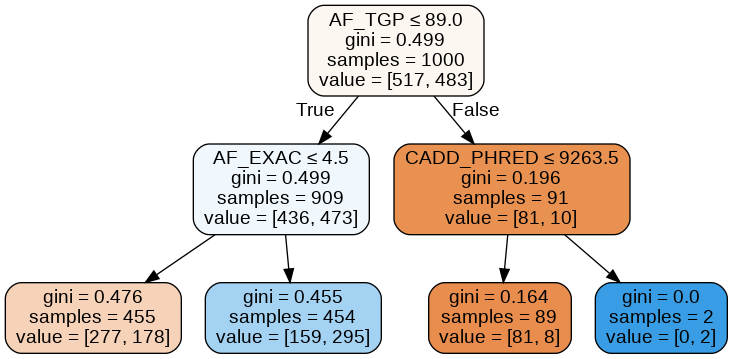

In [59]:
#make a decision tree 
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Train/Test RMSE: 0.66783231428256   0.8631644815603429
Decision Tree Train/Test RMSE: 0.5873670062235365   0.5160411921946969
Decision Tree Train/Test RMSE: 0.565685424949238   0.5160411921946969
Decision Tree Train/Test RMSE: 0.5531726674375732   0.5160411921946969
Decision Tree Train/Test RMSE: 0.5385164807134504   0.5160411921946969
Decision Tree Train/Test RMSE: 0.5167204273105526   0.5160411921946969
Decision Tree Train/Test RMSE: 0.48166378315169184   0.8631644815603429
Decision Tree Train/Test RMSE: 0.4289522117905443   0.8631644815603429
Decision Tree Train/Test RMSE: 0.3781534080237807   0.5049228433856647
Decision Tree Train/Test RMSE: 0.32710854467592254   0.5049228433856647


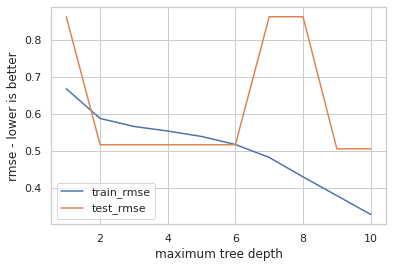

In [60]:
# measure testing errors 
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()


In [61]:
best_decision_tree = DecisionTreeClassifier(max_depth=3)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

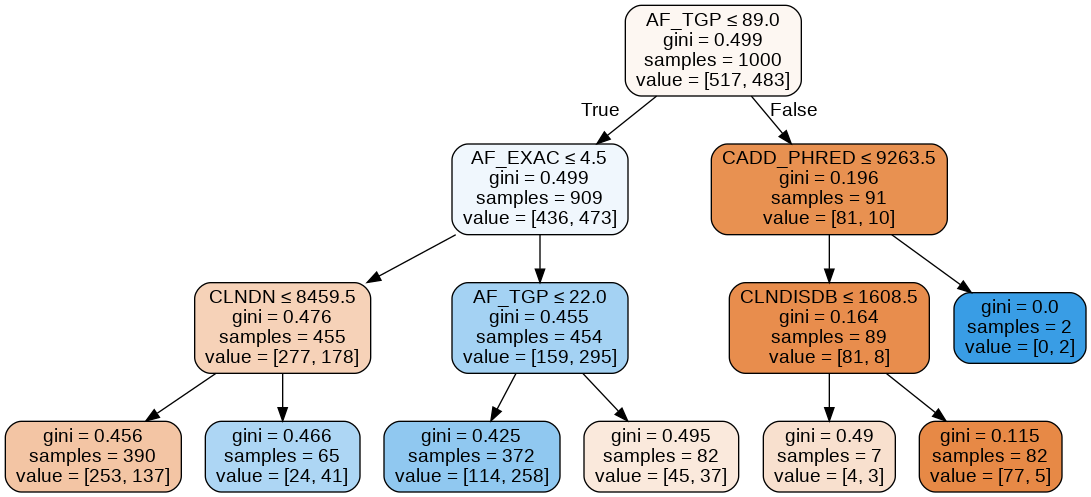

In [62]:
dot_data2 = StringIO()  
export_graphviz(best_decision_tree, out_file=dot_data2,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph_best = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph_best.create_png()) 

In [63]:
# use fitted model to make predictions on testing data
y_pred = best_decision_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

#ValueError: Classification metrics can't handle a mix of binary and continuous targets

confusion matrix:
 [[4783   74]
 [1662    0]]


In [65]:
print(" Classification Report:\n", metrics.classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85      4857
           1       0.00      0.00      0.00      1662

    accuracy                           0.73      6519
   macro avg       0.37      0.49      0.42      6519
weighted avg       0.55      0.73      0.63      6519



# Gradient Boosting after balancing data

In [66]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2549


In [67]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4857    0]
 [1662    0]]


In [68]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      4857
           1       0.00      0.00      0.00      1662

    accuracy                           0.75      6519
   macro avg       0.37      0.50      0.43      6519
weighted avg       0.56      0.75      0.64      6519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Building neural network


In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(activation="relu", input_dim=19, units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
1000/1000 [==============================] - 0s 364us/step - loss: 6.5721 - accuracy: 0.5350
Epoch 2/150
1000/1000 [==============================] - 0s 23us/step - loss: 2.3077 - accuracy: 0.4870
Epoch 3/150
1000/1000 [==============================] - 0s 20us/step - loss: 1.1928 - accuracy: 0.5230
Epoch 4/150
1000/1000 [==============================] - 0s 19us/step - loss: 0.9131 - accuracy: 0.4940
Epoch 5/150
1000/1000 [==============================] - 0s 18us/step - loss: 0.8265 - accuracy: 0.5040
Epoch 6/150
1000/1000 [==============================] - 0s 17us/step - loss: 0.8012 - accuracy: 0.4990
Epoch 7/150
1000/1000 [==============================] - 0s 18us/step - loss: 0.7506 - accuracy: 0.5060
Epoch 8/150
1000/1000 [==============================] - 0s 18us/step - loss: 0.7471 - accuracy: 0.5100
Epoch 9/150
1000/1000 [==============================] - 0s 15us/step - loss: 0.7289 - accuracy: 0.5070
Epoch 10/150
1000/1000 [==============================] - 0s 20

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [73]:

cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[   0 4857]
 [   0 1662]]


In [74]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4857
           1       0.25      1.00      0.41      1662

    accuracy                           0.25      6519
   macro avg       0.13      0.50      0.20      6519
weighted avg       0.06      0.25      0.10      6519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [75]:

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



[(0, 48754), (1, 48754)]


## After SMOTE, decision tree modeling

In [76]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

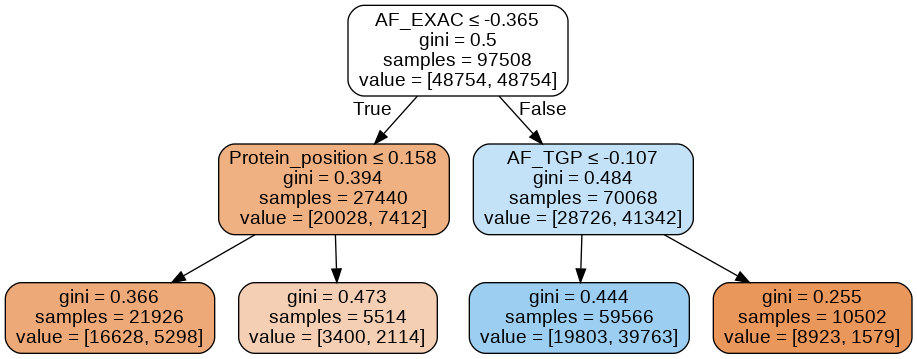

In [77]:
#make a decision tree 
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [78]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[   0 4857]
 [   0 1662]]


In [79]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4857
           1       0.25      1.00      0.41      1662

    accuracy                           0.25      6519
   macro avg       0.13      0.50      0.20      6519
weighted avg       0.06      0.25      0.10      6519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##After SMOTE, RandomForest

In [0]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

In [81]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[4857    0]
 [   0 1662]]


In [82]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4857
           1       1.00      1.00      1.00      1662

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519



## After SMOTE, logistic regression

In [0]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_resampled, y_resampled)
class_pred_class_log = logreg.predict(X_test)


In [84]:
cm2 = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[2311 2546]
 [ 493 1169]]


In [85]:
print("Classification Report:\n", metrics.classification_report(y_test, class_pred_class_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.48      0.60      4857
           1       0.31      0.70      0.43      1662

    accuracy                           0.53      6519
   macro avg       0.57      0.59      0.52      6519
weighted avg       0.69      0.53      0.56      6519



##After SMOTE, Gradient boosting

In [0]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

In [87]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[3686 1171]
 [ 657 1005]]


In [88]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      4857
           1       0.46      0.60      0.52      1662

    accuracy                           0.72      6519
   macro avg       0.66      0.68      0.66      6519
weighted avg       0.75      0.72      0.73      6519



In [0]:
model = XGBClassifier()
model.fit(X_resampled, y_resampled)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [90]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[3712 1145]
 [ 665  997]]


In [91]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      4857
           1       0.47      0.60      0.52      1662

    accuracy                           0.72      6519
   macro avg       0.66      0.68      0.66      6519
weighted avg       0.75      0.72      0.73      6519



# Isolation Forest to find outliers

In [0]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_drop_numeric.values.reshape(-1, 1))
xx = np.linspace(df_drop_numeric.min(), df_drop_numeric.max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)



In [0]:
outlier

In [0]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 900, 1: 900})

In [0]:
OneHotEncoder().fit_transform(df)

# Additional EDA

In [93]:
df.corr()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,EXON,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.010502,0.012061,0.021837,0.327991,0.329113,0.329112,-0.122896,0.257226,-0.005409,-0.009753
AF_ESP,0.007003,1.000000,0.851870,0.807741,-0.010724,-0.126538,0.000099,-0.024619,-0.023500,-0.023506,-0.011551,0.027343,-0.164169,-0.148118
AF_EXAC,0.007721,0.851870,1.000000,0.805634,-0.010286,-0.121213,0.001589,-0.021365,-0.020213,-0.020218,-0.013358,0.027831,-0.154891,-0.140803
AF_TGP,0.004225,0.807741,0.805634,1.000000,-0.011208,-0.130077,-0.000339,-0.025682,-0.023830,-0.023836,-0.014002,0.029447,-0.167057,-0.150989
ORIGIN,0.010502,-0.010724,-0.010286,-0.011208,1.000000,0.002920,0.008834,-0.010810,-0.011175,-0.011173,-0.009731,-0.023043,0.051741,0.057404
CLASS,0.012061,-0.126538,-0.121213,-0.130077,0.002920,1.000000,0.011078,0.032892,0.035065,0.035065,-0.031369,0.000045,-0.037713,-0.053485
EXON,0.021837,0.000099,0.001589,-0.000339,0.008834,0.011078,1.000000,0.235224,0.236040,0.236040,-0.022389,-0.038996,0.026073,0.037106
cDNA_position,0.327991,-0.024619,-0.021365,-0.025682,-0.010810,0.032892,0.235224,1.000000,0.999889,0.999889,-0.170250,0.338359,0.018138,0.014102
CDS_position,0.329113,-0.023500,-0.020213,-0.023830,-0.011175,0.035065,0.236040,0.999889,1.000000,1.000000,-0.172734,0.340800,0.014677,0.010855
Protein_position,0.329112,-0.023506,-0.020218,-0.023836,-0.011173,0.035065,0.236040,0.999889,1.000000,1.000000,-0.172734,0.340800,0.014702,0.010879


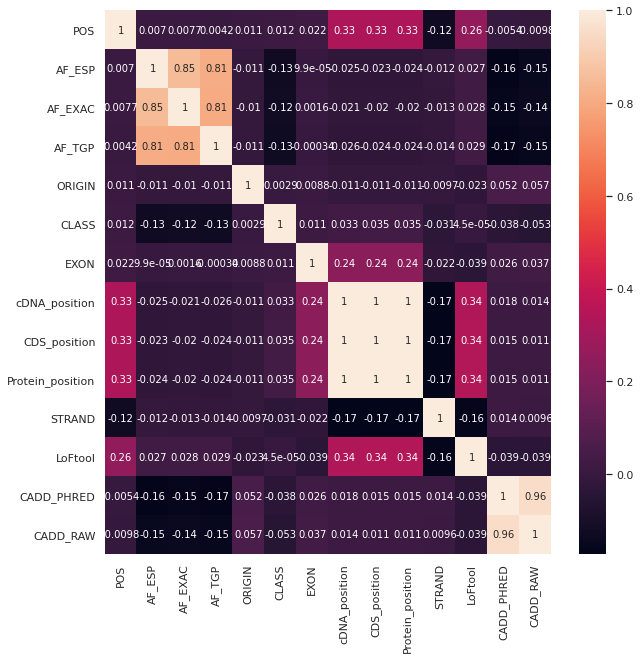

In [94]:
fig, ax = plt.subplots (figsize = (10,10))
sns.heatmap(df.corr(), annot = True, ax= ax)
plt.show()

In [0]:
# compare allele frequencies from different sources.
#CADD is a tool for scoring the deleteriousness of single nucleotide variants as well as insertion/deletions variants in the human genome.


In [0]:
#MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP

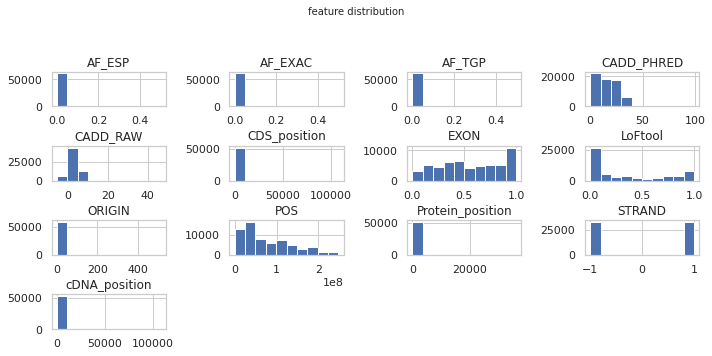

In [95]:
df.drop('CLASS', axis =1).hist(figsize = (10,5))
plt.suptitle("feature distribution", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, 'Consequence of varients with confliciting class')

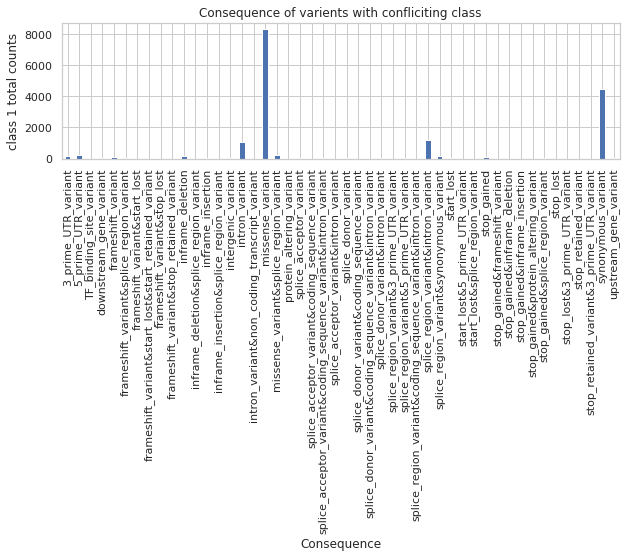

In [96]:
plt.figure(figsize = (10,2.5), frameon = False)
df.groupby('Consequence')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Consequence of varients with confliciting class')

Text(0.5, 1.0, 'Chromosome location of varients with confliciting class')

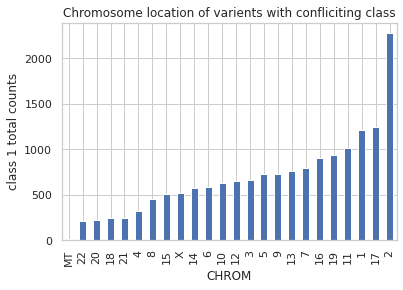

In [97]:
df.groupby('CHROM')['CLASS'].sum().sort_values().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Chromosome location of varients with confliciting class')

# how do I sort values here?

In [0]:
df_class0 = df[df['CLASS'] == 0]

In [0]:
df_class0.info()

Text(0.5, 1.0, 'mutation types with confliciting class')

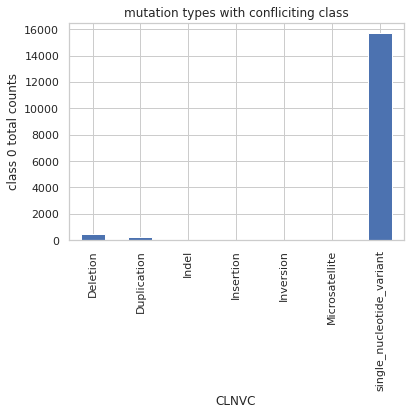

In [100]:
df.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('mutation types with confliciting class')

Text(0.5, 1.0, 'impact of mutation with confliciting class')

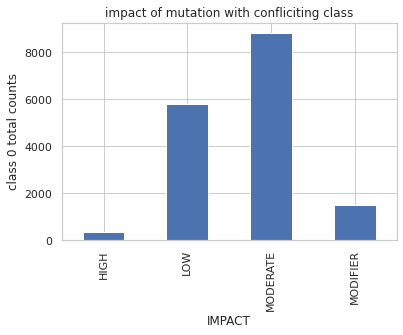

In [102]:
df.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('impact of mutation with confliciting class')

Text(0.5, 1.0, 'impact of mutation with confliciting class')

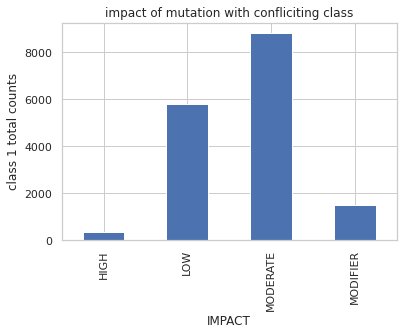

In [106]:
df.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('impact of mutation with confliciting class')